**Data Set Information:**

Perform energy analysis using 12 different building shapes simulated in Ecotect (Ecotect Software has been used to calculate building's energy consumption by simulating its context within the environment.). The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

**Attribute Information:**

The dataset contains eight attributes (or features, denoted by X1…X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:

X1 Relative Compactness

X2 Surface Area

X3 Wall Area

X4 Roof Area

X5 Overall Height

X6 Orientation

X7 Glazing Area

X8 Glazing Area Distribution

y1 Heating Load

y2 Cooling Load

**PROBLEM STATEMENT**

Electrical energy consumption has been increasing over the years as more entities are being electricified day by day. Statistics show that 1/3rd of the energy produced are consumed by Buildings, where people spend most of their time. With increasing demand in energy globally, there is need for efficient use of the energy supplied especially in buildings.

**TECHNICAL OBJECTIVE**

Develop a machine learning model to predict cooling energy and heating energy consumption in residential buildings.

**TECHNICAL IMPLICATION OF USING HEATING AND COOLING ENERGY CONSUMPTION PREDICTION MODEL**

The use of predictive models for energy consumption can help in optimal sizing of the cooling and heating system in a building thereby improving energy efficiency.

*Energy Savings:* Properly sized heating/cooling systems operate at higher efficiencies, resulting in energy savings and reduced operating costs.

*Reduced Wear and Tear:* Oversized systems often cycle on and off more frequently, which can lead to increased wear and tear on equipment. Right-sizing prevents this issue.

*Comfort:* Systems that are too large may lead to temperature swings and discomfort for occupants. Predictive modeling can help avoid this by ensuring that the system is appropriately sized to maintain consistent comfort.

**ML/DS Goals**

* Identify missing values and outliers
* Explore the data using histogram, boxplots, and barcharts visualizations
* Identify important features through univariate and multivariate analysis
* Apply Feature Engineering to prepare data for modelling
* Build Model
* Evaluation of model perfromance
* Testing of models

# 1. Load Dataset

In [2]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

#libraries for modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [4]:
df = pd.read_excel('ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Observations

There are 8 features in the dataset and they are labelled X1 to X8 and 2 target variables , Y1 and Y2. There are 768 samples in the dataset. There are only continuous varibales in the dataset, no noticeable categorical variable(s).

In [5]:
df.rename(columns= {"X1": "Relative Compactness", "X2" :"Surface Area" ,"X3": "Wall Area","X4": "Roof Area", "X5":"Overall Height","X6" :"Orientation","X7": "Glazing Area","X8" : "Glazing Area Distribution","Y1": "Heating Load","Y2": "Cooling Load"}, inplace= True)

In [6]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

There is no missing values in the dataset

In [9]:
#unique values

df.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 587
Cooling Load                 636
dtype: int64

The surface area of the dataset has only 12 unique values, this means that there are only 12 different building shape. All of these 12 building shapes can have any of the 7 Wall Area and 4 Roof Area amongst other properties. Different combination of these unique variables gave rise to the 768 examples.

# 2. Exploratory Data Analysis

It  involves examining and visualizing a dataset to understand its structure, characteristics, and patterns.


---


**Descriptive Statitics**
These statistics provide a simple way to understand and interpret data, allowing you to gain insights into the data's

*   Central Tendencies
*   Variability
*   Distribution
*   Shape


---


**Univariate and Multivariate Analysis using Visualization**

Create visualizations like histograms, box plots, scatter plots, and bar charts to explore

*   Distribution of the Data
*   Identify outliers
*   Understand the relationships between variables


---


Data Preparation

This involves preparing the data for modelling

*  Data Transformation
*  Feature Selection

In [10]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


From the descriptive statistics of the dataset, it is observed that the spread or variation of the data is small as the mean values and median values are quite close in figures.

There are some buildings with no glazing area as the minimum shows 0. This scenario is quite unusual in residential construction because windows and other glazed openings are essential for ventilation and natural lighting.

The building cooling and heating load have almost the same distribution, their mean, std, 25%, median and max values are close to another

All of these observation can be better visualized with plots.

N.B=> Glazing area is any portion of the building covered with glass or a transparent material, can be window or door of the building.

In [11]:
#summary for building with no glazing area
df[df['Glazing Area']==0].describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.0,48.000000,48.000000
mean,0.764167,671.708333,318.500000,176.604167,5.250000,3.500000,0.0,0.0,14.286375,19.706250
std,0.106827,88.960297,44.059438,45.614184,1.768519,1.129865,0.0,0.0,7.625329,8.134356
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.0,0.0,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.500000,2.750000,0.0,0.0,7.037500,12.047500
50%,0.750000,673.750000,318.500000,183.750000,5.250000,3.500000,0.0,0.0,13.200000,18.980000
75%,0.830000,741.125000,343.000000,220.500000,7.000000,4.250000,0.0,0.0,19.747500,25.860000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.0,0.0,29.900000,39.440000


There are about 48 houses with no glazing area, the features have almost the same distribution as the overall dataset

### A. Univariate Analysis

In [12]:
def box_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) :
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]  ##floor division, remainder of division
        else:
            ax = axs[idx]

        sns.boxplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Box Plot of {feat!r}")

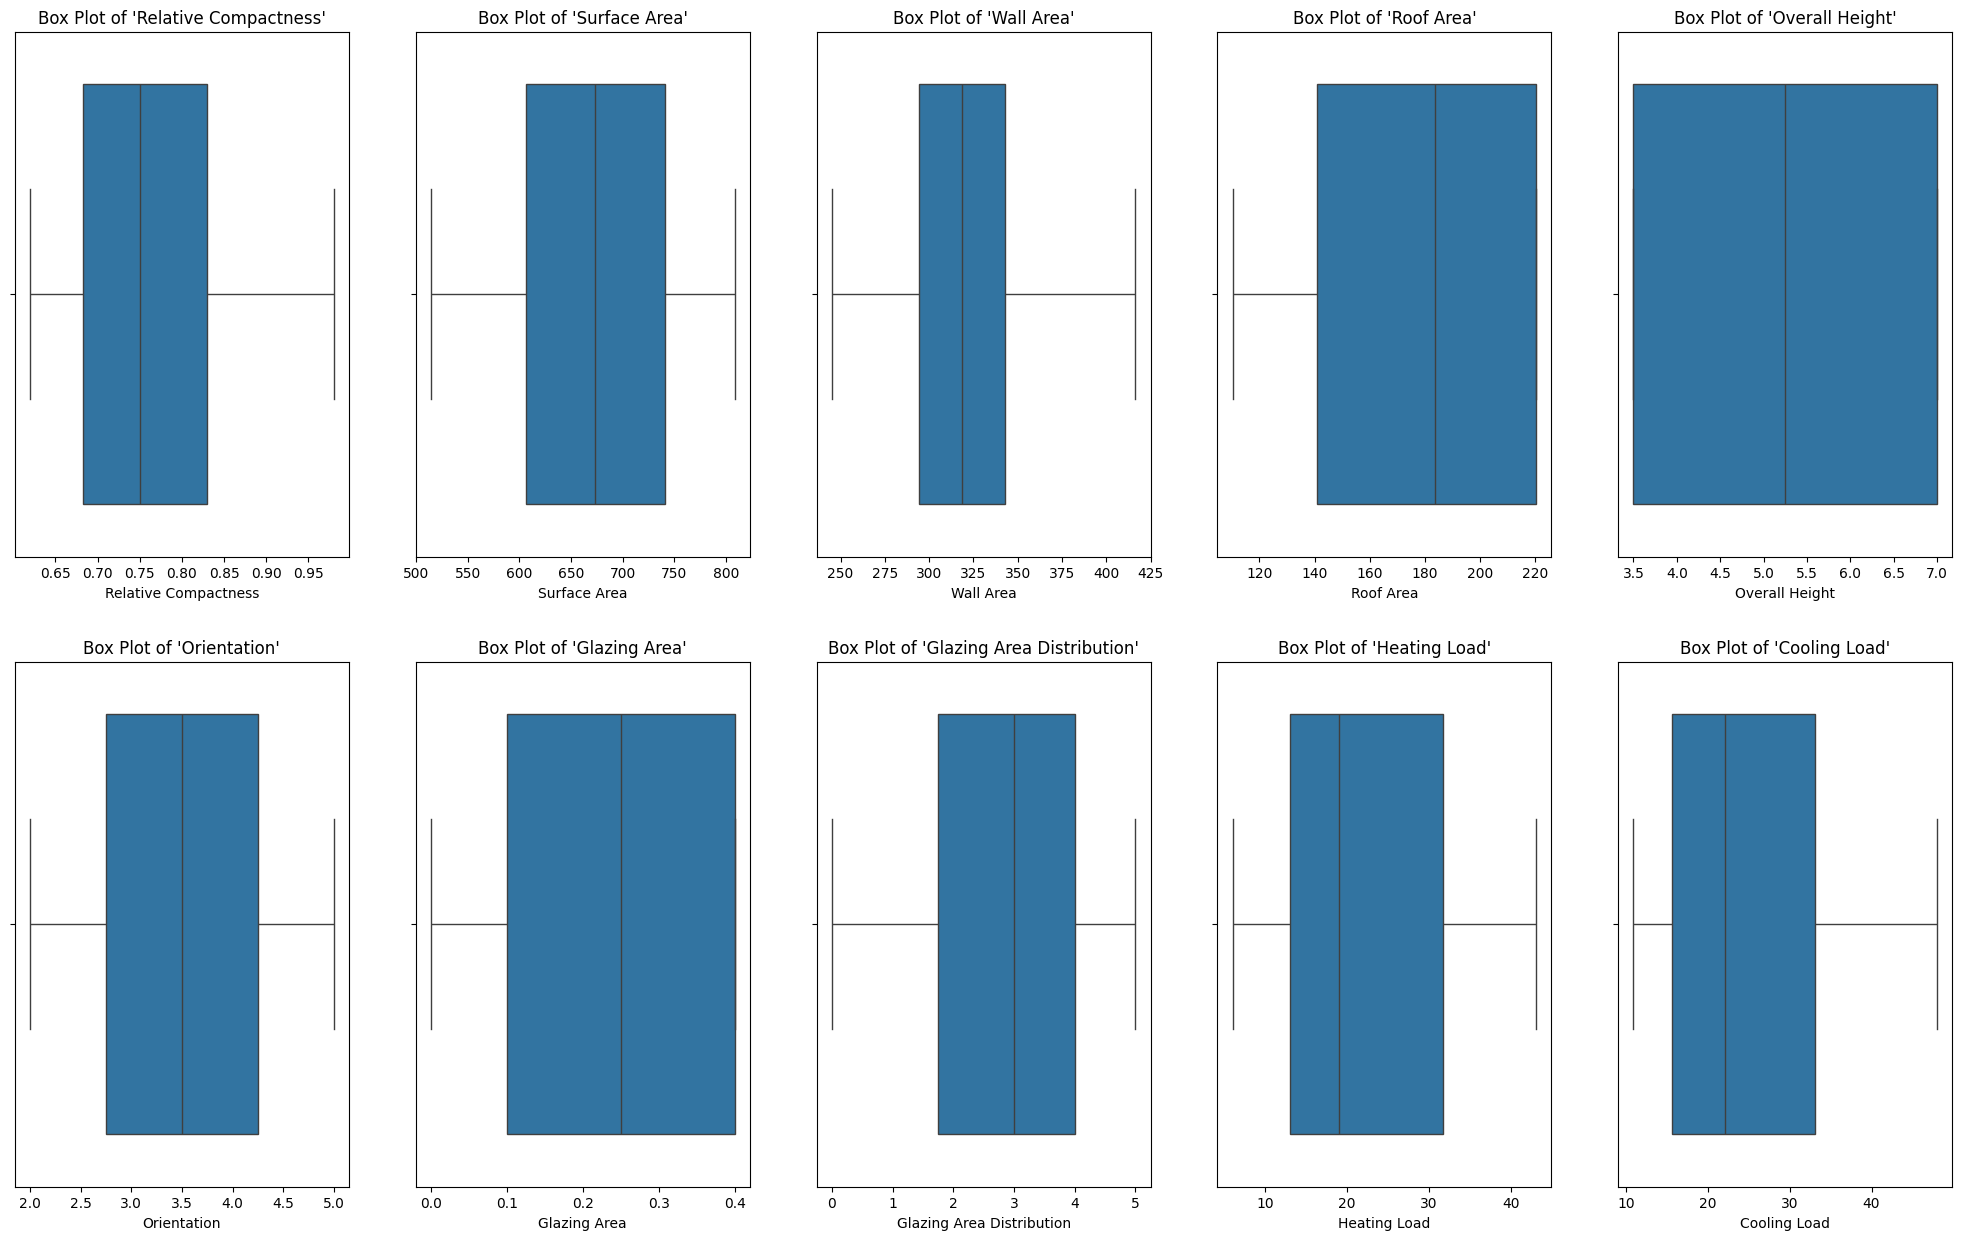

In [13]:
box_plots(data=df,features=df.columns,n_rows=2, n_cols=5, figsize=(25,15))

The boxplot show there are no outliers in this dataset

In [14]:
#histogrom to see distribution of their values

def Hist_plots(data:pd.DataFrame, features:list, n_rows:int, n_cols:int, figsize:tuple=(15,8)):
  fig,axs = plt.subplots(n_rows, n_cols, figsize=figsize)

  for idx, feat in enumerate(features):
    if n_rows>1:
      ax=axs[(idx//n_cols),(idx%n_cols)]
    else:
      ax=axs[idx]

    sns.histplot(data=data,x=feat, ax=ax)
    ax.set_title(f"Hist Plot of {feat}")

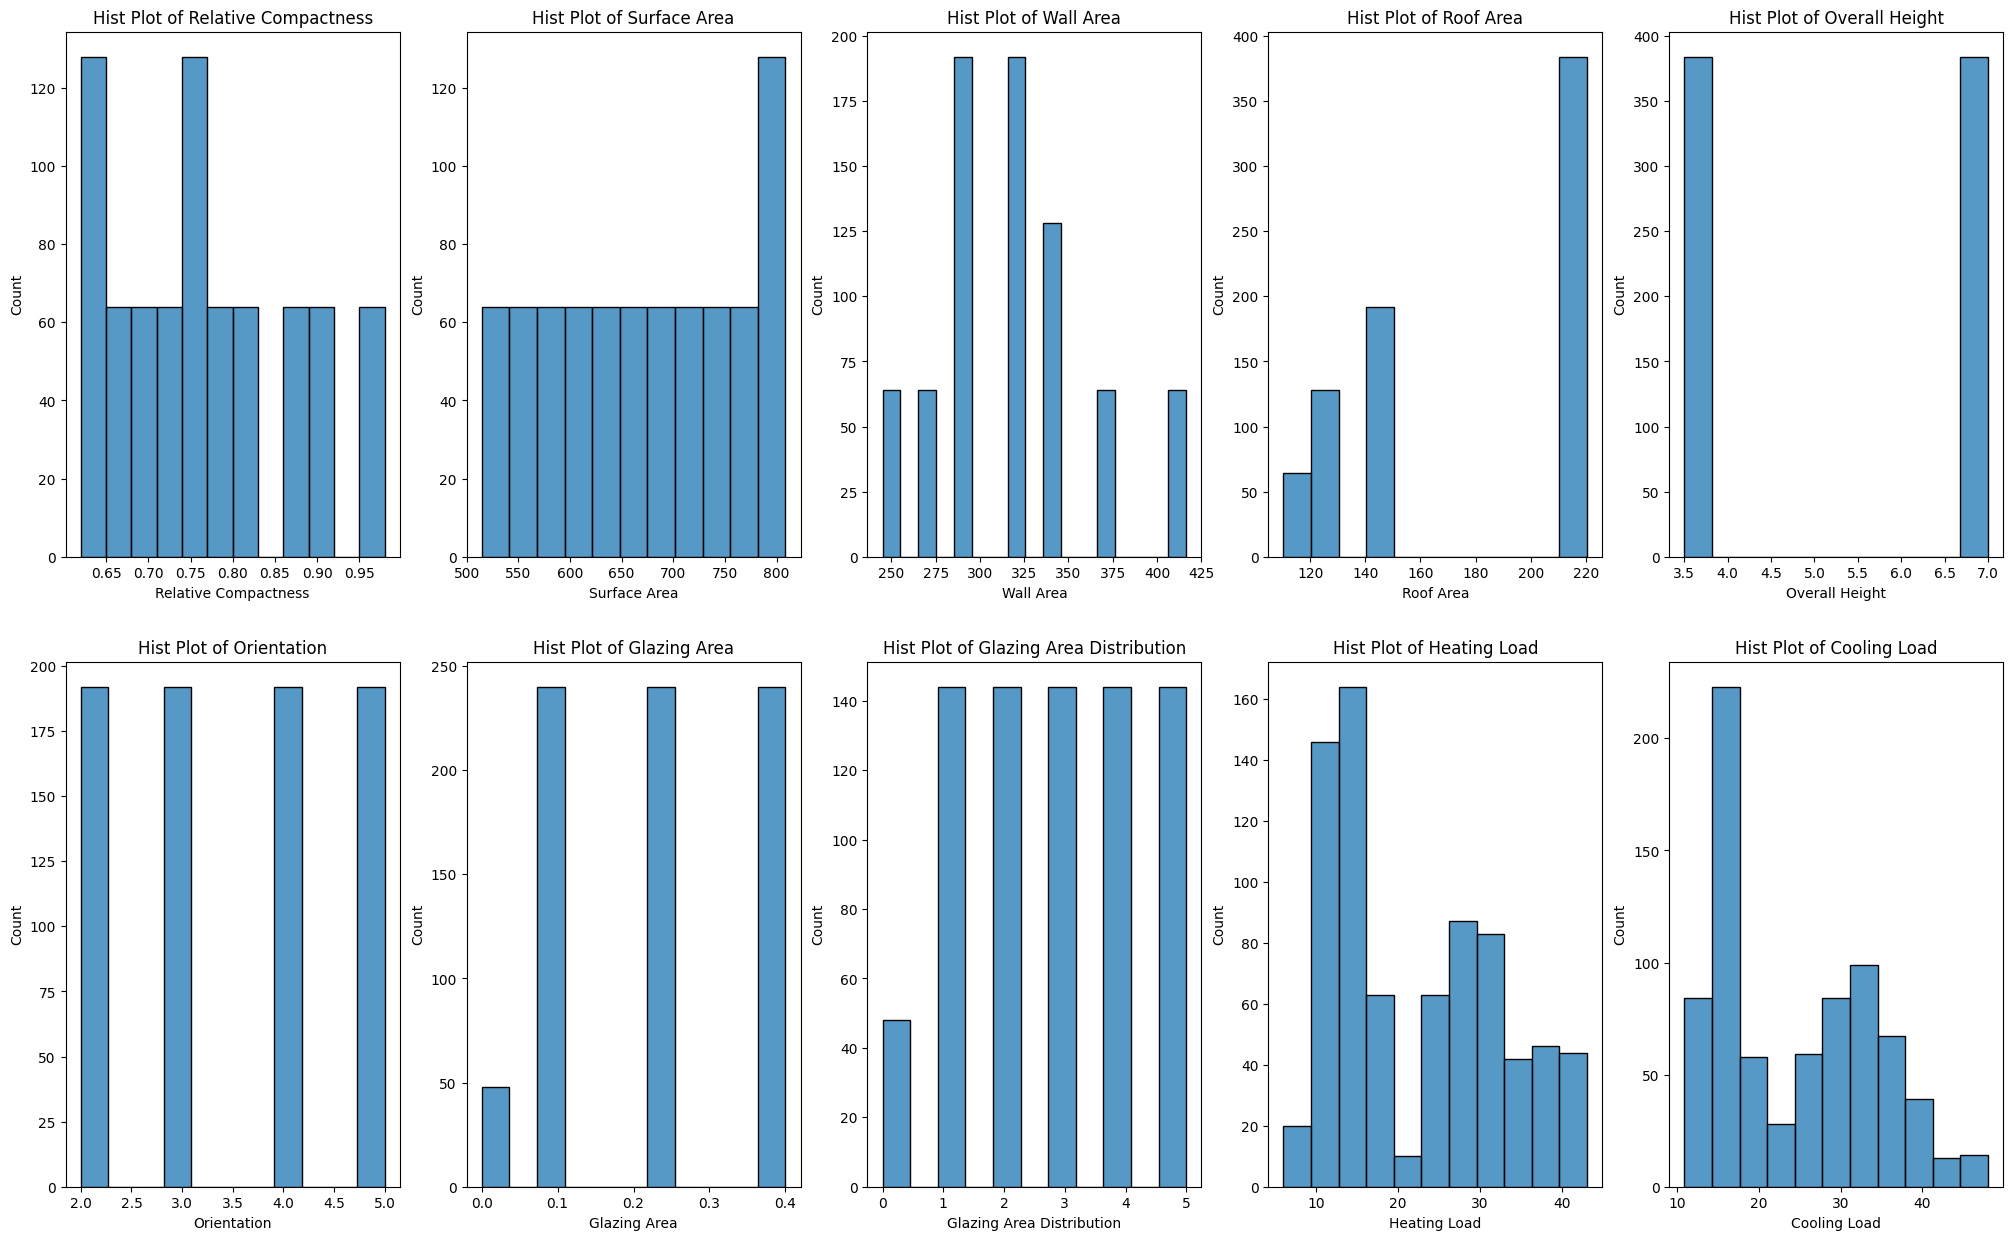

In [15]:
Hist_plots(data=df, features=df.columns, n_rows=2, n_cols=5, figsize=(25,15))

**Key Observations**

Some of the features have values with equal distribution of values, i.e Overall Height, Orientation
The Orientation might be a categorical variables as it has only 4 unique values since Orientation of a building usually mean the position of that building with respect to the north
Most of the buildings have glazing area between 0.1 and 0.4 unit squares
The Heating Load and Cooling Load are postively skewed.

**Insights**

All the buildings have height of either 3.5 or 7, this might mean the buildings are either a storey or bungalow.
The buildings can have one of 4 orientation/position.

In [16]:
#skewness of target variable

print(f"Skewness of Heating Load: {df['Heating Load'].skew()}")
print(f"Skewness of Cooling Load: {df['Cooling Load'].skew()}")

Skewness of Heating Load: 0.3604456768846134
Skewness of Cooling Load: 0.39599246696276713


Skewness quantifies the direction and degree of asymmetry in a distribution, where positive skewness (greater than 0) indicates a right-skewed distribution, and negative skewness (less than 0) indicates a left-skewed distribution. In a right-skewed distribution, the right tail is longer, and in a left-skewed distribution, the left tail is longer.

The target variable is skewed to the right by 0.4 approximately.

In [17]:
#percentage of each class in Orientation feature

df["Orientation"].value_counts(normalize=True)

Orientation
2    0.25
3    0.25
4    0.25
5    0.25
Name: proportion, dtype: float64

In [18]:
df['Glazing Area'].value_counts(normalize=True)

Glazing Area
0.10    0.3125
0.25    0.3125
0.40    0.3125
0.00    0.0625
Name: proportion, dtype: float64

In [19]:
df['Overall Height'].value_counts(normalize=True)

Overall Height
7.0    0.5
3.5    0.5
Name: proportion, dtype: float64

### B. Multivariate Analysis

For Multivariate analysis, we will look at how each feature affect the target variables.

Text(0.5, 1.0, 'Cooling Load Vs Overall Height')

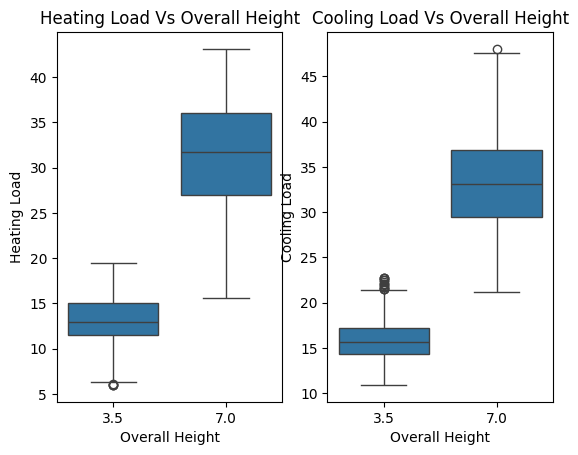

In [20]:
#relationship between categorical features and target variables


#Overall height and Heating/Cooling relationship


fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df, x="Overall Height", y= "Heating Load", ax=ax[0])
ax[0].set_title("Heating Load Vs Overall Height") #set title for axis 0

sns.boxplot(data=df, x="Overall Height", y="Cooling Load", ax=ax[1])
ax[1].set_title("Cooling Load Vs Overall Height") #set title for axis 1

The plot shows that higher building needs more Cooling/Heating load than building with smaller height

<Figure size 1000x1000 with 0 Axes>

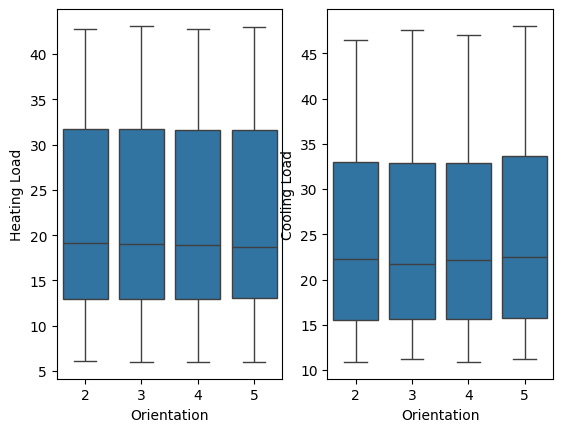

In [21]:
#Orientation and Heating/Cooling values

plt.figure(figsize=(10,10))
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df, x="Orientation", y= "Heating Load", ax=ax[0])
sns.boxplot(data=df, x="Orientation", y="Cooling Load", ax=ax[1]);

### Observation
There is no visible relationship between Orietation and target variables


Hence, Orientation feature should be dropped

<Figure size 1000x1000 with 0 Axes>

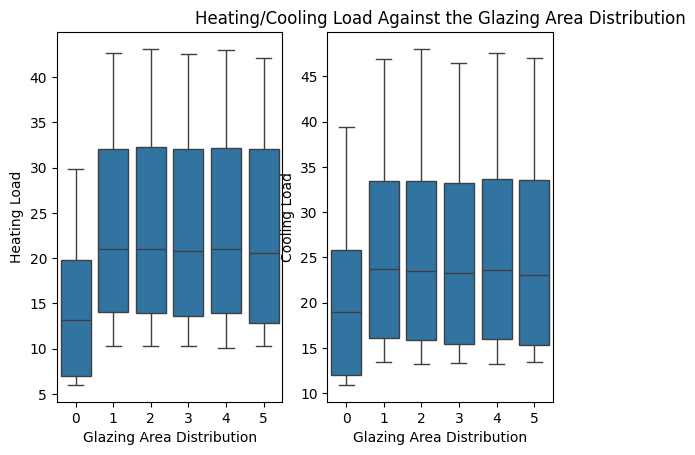

In [22]:
#Glazing Area and Target Variable

plt.figure(figsize=(10,10))
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df, x="Glazing Area Distribution", y= "Heating Load", ax=ax[0])
sns.boxplot(data=df, x="Glazing Area Distribution", y="Cooling Load", ax=ax[1])
plt.title("Heating/Cooling Load Against the Glazing Area Distribution");

From the plot of the Heating Load vs the Glazing Area Distribution, it is seen that the cooling load and heating load is affected either when the Glazing Area Distribution is zero or greater than 0.

The feature will be binned to have a value of 0 and 1 to reduce dimensionality

In [23]:
df["Glazing Area Distribution"].replace({0:0,1:1,2:1,3:1,4:1,5:1}, inplace=True)

<Figure size 1000x1000 with 0 Axes>

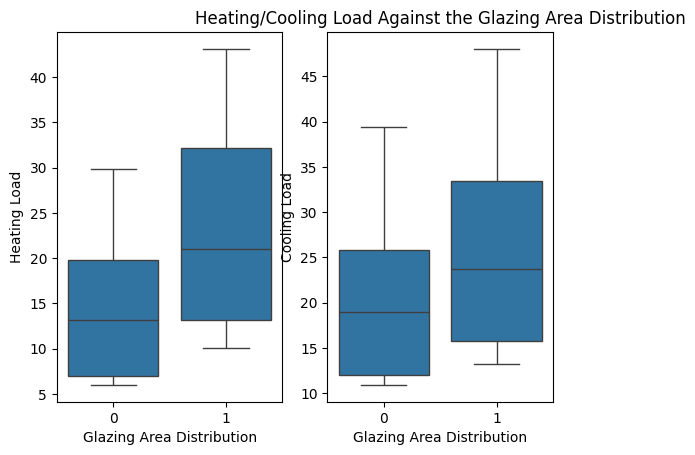

In [24]:
#plotting to show the relationship
plt.figure(figsize=(10,10))
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df, x="Glazing Area Distribution", y= "Heating Load", ax=ax[0])
sns.boxplot(data=df, x="Glazing Area Distribution", y="Cooling Load", ax=ax[1])
plt.title("Heating/Cooling Load Against the Glazing Area Distribution");

In [25]:
def Scatter_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
    y
) :

    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.scatterplot(data=data, x=feat, ax=ax, y=y)

        slope, intercept = np.polyfit(data[feat], data[y], 1) #get the slope and intercept of the line

        line_of_best_fit = slope * data[feat] + intercept   #get the y vectors

        sns.lineplot(data, x=feat, y=line_of_best_fit, label="Line of best fit", ax=ax) #plot the line of best fit

        ax.set_title(f"Scatter Plot of {feat} vs {y}")

A line of best fit is a straight line that minimizes the distance between it and some data. The line of best fit is used to express a relationship in a scatter plot of different data points. It is an output of regression analysis and can be used as a prediction tool for indicators and price movements.

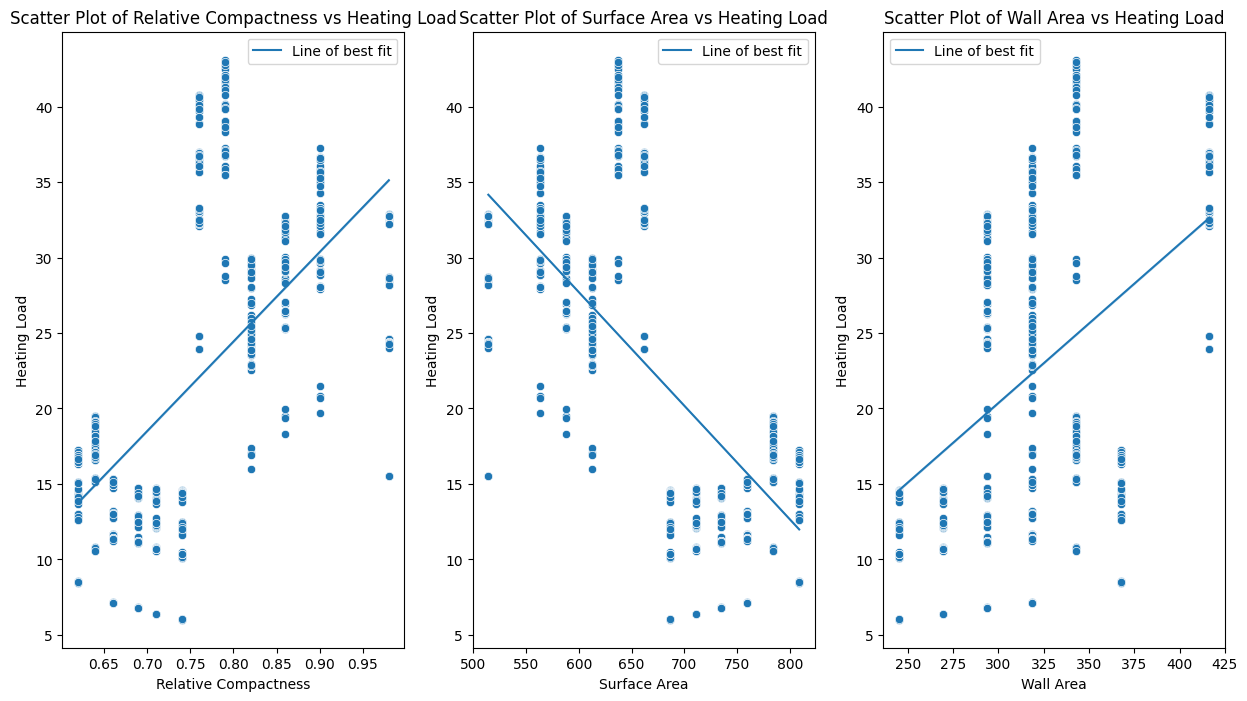

In [26]:
#checking for linear relationship between features and heating load

numerical_features=["Relative Compactness","Surface Area", "Wall Area"]
Scatter_plots(data=df, features=numerical_features,n_rows=1,n_cols=3,y="Heating Load")

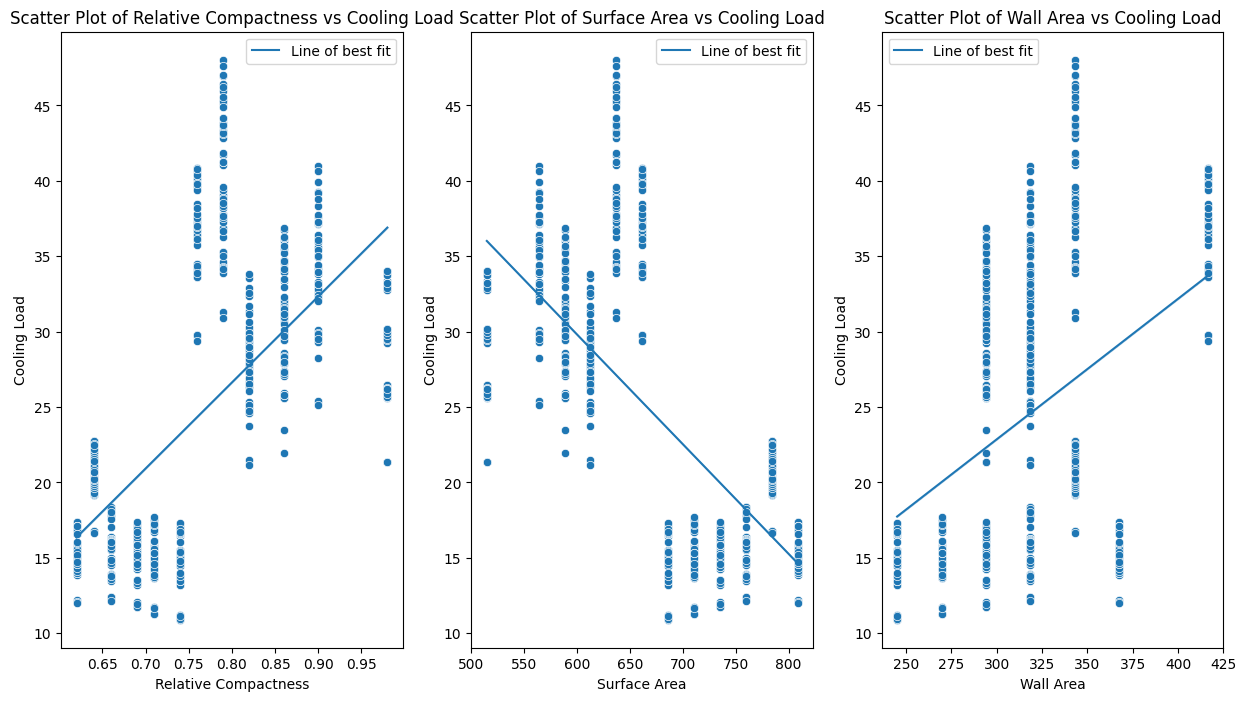

In [27]:
#checking for linear relationship between features and Cooling load
numerical_features=["Relative Compactness","Surface Area", "Wall Area"]
Scatter_plots(data=df, features=numerical_features,n_rows=1,n_cols=3,y="Cooling Load")

The scatter plots between the Cooling/Heating Load against some of the features shows that there is a correlation beteen the features and the Heating/Cooling load but it is not so clear because there are a lot of repeating values in the feature columns. The Pearson correlation coefficient will be used to measure the linear correlation between numerical variables to get more insight.

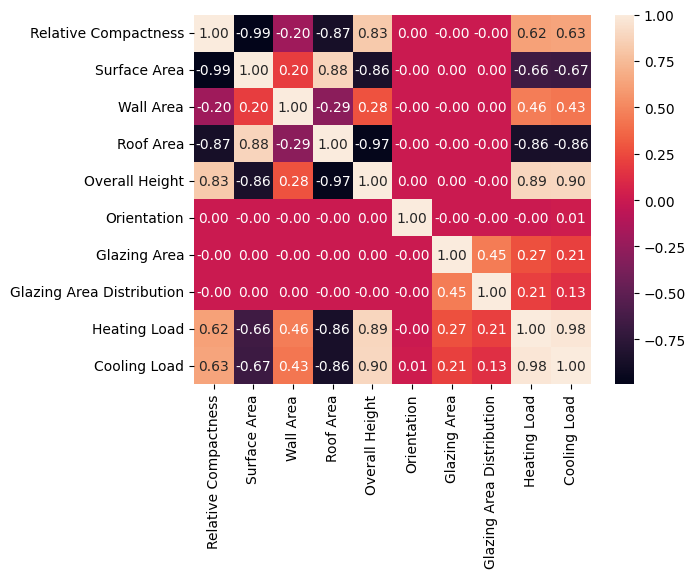

In [28]:
#get the pearson correlation values of the data
corr=df.corr(method = 'pearson')


#using heatmap to visulize the pearson correlation between variables
sns.heatmap(corr, annot=True,fmt=".2f");

The Pearson correlation coefficient (r) is the most common way of measuring a linear correlation. It is a number between –1 and 1 that measures the strength and direction of the relationship between two variables

### **Key Observations**

**Relationship between Features and Target Variables**

* The most correlated features with the target variables are Roof Area, Overall Height with negative and positive correlation respectively.
* Surface Area has a slightly negative correlation with the target variable
* Orientation , Wall Area, Grazing Area, Grazing Area Distribution have very low correlation with the target

**Relationship between Features**

* Surface Area and Relative Compactness have very high negative correlation of 0.99
* Wall Area has low correlation with other features
* Orientation has zero or almost zero correlation with other features

**Relationship between Targets**

* Cooling Load and Heating Load are highly correlated

**Insights**

* The factors that can affect the Cooling/Heating Load of a building are The Roof Area, and Overall Height, Relative Compactness and Surface Area

* The heatingload and cooling load show a high correlation and also almost identical distribution so one of them can be used during modelling.

**Action**

* Surface Area will be dropped as it has more correlation with other features compared to Relative Compactness. This is done to avoid collinearity.
* Orientation will also be dropped since it has no correlation with target values

In [29]:
#drops

df.drop("Surface Area", inplace=True, axis=1)
df.drop("Orientation", inplace=True, axis=1)

# 3. Feature Engineering

Since the target variables have almost the same distribution as observed from the descriptive statistics, only one of the target variable will be used for modelling.

In [30]:
TEST_SIZE=0.2    #test size of dataset
RANDOM_STATE= 42
X=df.drop(["Heating Load", "Cooling Load"], axis=1) #drop along the column
y=df["Cooling Load"]   #subset the column Cooling Load

#split dataset into train and test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

X_train.shape, X_test.shape

((614, 6), (154, 6))

The feature engineering entails Scaling of the numerical features to have the same scale across the features

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       614 non-null    float64
 1   Wall Area                  614 non-null    float64
 2   Roof Area                  614 non-null    float64
 3   Overall Height             614 non-null    float64
 4   Glazing Area               614 non-null    float64
 5   Glazing Area Distribution  614 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 33.6 KB


In [32]:
var_to_scale= X_train.select_dtypes(include=['float64','int64']).columns  #variable to apply min max scaler

In [33]:
##  https://www.analyticsvidhya.com/blog/2021/05/understanding-column-transformer-and-machine-learning-pipelines/

# ===== Scaler =====
scaler = MinMaxScaler()

#column transformer instantiation
col_transformer = ColumnTransformer(
    transformers=[ ("scaler", scaler, var_to_scale)],
    remainder="passthrough",
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', MinMaxScaler(),
                                 Index(['Relative Compactness', 'Wall Area', 'Roof Area', 'Overall Height',
       'Glazing Area', 'Glazing Area Distribution'],
      dtype='object'))])

In [34]:
  #apply transformation to training set and test set
X_train_trans=col_transformer.fit_transform(X_train)
X_test_trans=col_transformer.transform(X_test)

In [35]:
#view the untransformed data
X_train

,Relative Compactness,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
60,0.82,318.5,147.00,7.0,0.10,1
618,0.64,343.0,220.50,3.5,0.40,1
346,0.86,294.0,147.00,7.0,0.25,1
294,0.90,318.5,122.50,7.0,0.25,1
231,0.66,318.5,220.50,3.5,0.10,1
...,...,...,...,...,...,...
71,0.76,416.5,122.50,7.0,0.10,1
106,0.86,294.0,147.00,7.0,0.10,1
270,0.71,269.5,220.50,3.5,0.10,1
435,0.98,294.0,110.25,7.0,0.25,1


In [36]:
#transformed train data
df_train_trans=pd.DataFrame(data=X_train_trans, columns=X_train.columns)
df_train_trans

,Relative Compactness,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
0,0.555556,0.428571,0.333333,1.0,0.250,1.0
1,0.055556,0.571429,1.000000,0.0,1.000,1.0
2,0.666667,0.285714,0.333333,1.0,0.625,1.0
3,0.777778,0.428571,0.111111,1.0,0.625,1.0
4,0.111111,0.428571,1.000000,0.0,0.250,1.0
...,...,...,...,...,...,...
609,0.388889,1.000000,0.111111,1.0,0.250,1.0
610,0.666667,0.285714,0.333333,1.0,0.250,1.0
611,0.250000,0.142857,1.000000,0.0,0.250,1.0
612,1.000000,0.285714,0.000000,1.0,0.625,1.0


# 4. Modeling


The target variable Cooling Load in energy dataset is a continuous variable, so this problem will be solved as a regression problem.

Based on the following criteria, the Linear Regression algorithm will be selected for the first experiment.

Linearity: The relationship between the independent variables and the dependent variable should be approximately linear.

Little Multicollinearity: There should be little or no relationship between the features

Homoscedasticity: The variance of the errors should be constant across all levels of the independent variables. In other words, the spread of the residuals should remain roughly the same as you move along the regression line.

### A. Baseline Model

A baseline model is a simple model with very low predictive power. It will be used as a benchmark to compare the performance of machine learning regression models.

In [37]:
#function to calculate the prediction from a baseline model using its mean parameter
#takes the target value as input and returns predicted values i.e the mean of the target values

def zero_rule_algorithm_regression(y_train,y_test):
  prediction = np.mean(y_train)
  y_pred = [prediction]*len(y_test)
  return y_pred



#performance metrics function - calculates MSE, RMSE, MAE
def performance_metrics(y_pred,y_test):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  r2=r2_score(y_test, y_pred)    #tells how well the data fit the regression model
  return f"Mean Absolute Error: {mae}\n Mean Squared Error: {mse}\n Root Mean Squared Error: {rmse}\n R2: {r2}"

In [38]:
y_pred_baseline = zero_rule_algorithm_regression(y_train, y_test)

In [39]:
baseline_error_y = performance_metrics(y_pred_baseline, y_test)

print(f"Baseline Error for y: \n{baseline_error_y}")

Baseline Error for y: 
Mean Absolute Error: 8.74185329328652
 Mean Squared Error: 93.43635392999795
 Root Mean Squared Error: 9.666248182723116
 R2: -0.008408593861118474


Any model that gives a value higher than these values will be considered poor.

### B. Regression Algorithms

Regression algorithms that will be considered in this project are


*   Linear Regression
*   Decision Trees
*   Random Forest
*   SVM
*   KNN


In [40]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
  models = [
      ("Linear Regression", LinearRegression()),
      ("Decision Tree", DecisionTreeRegressor()),
      ("Random Forest", RandomForestRegressor()),
      ("SVM", SVR()),
      ("K-Nearest Neighbors", KNeighborsRegressor())
  ]

  #lists to store the results
  model_names = []
  mse_values = []
  mae_values = []
  rmse_values = []
  r2_values = []


  #fit and evaluate each model
  for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse= mean_squared_error(y_test, y_pred)
    mae= mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    model_names.append(model_name)
    mse_values.append(mse)
    mae_values.append(mae)
    rmse_values.append(rmse)
    r2_values.append(r2)

  metrics_df=pd.DataFrame({
      'Model': model_names,
      'Mean Absolute Error': mae_values,
      'Root Mean Squared Error': rmse_values,
      'Mean Squared Error': mse_values,
      'R-squared (R2)': r2_values
  })
  return metrics_df

In [41]:
# Untransformed data
train_and_evaluate_models(X_train,X_test,y_train, y_test)


,Model,Mean Absolute Error,Root Mean Squared Error,Mean Squared Error,R-squared (R2)
0,Linear Regression,2.187545,3.106592,9.650917,0.895843
1,Decision Tree,1.165358,1.748119,3.055920,0.967019
2,Random Forest,1.165219,1.747278,3.052980,0.967051
3,SVM,3.350358,4.650678,21.628810,0.766572
4,K-Nearest Neighbors,1.330636,2.136077,4.562823,0.950756


In [42]:
#Transformed Data
train_and_evaluate_models(X_train_trans,X_test_trans,y_train, y_test)

,Model,Mean Absolute Error,Root Mean Squared Error,Mean Squared Error,R-squared (R2)
0,Linear Regression,2.187545,3.106592,9.650917,0.895843
1,Decision Tree,1.165358,1.748119,3.055920,0.967019
2,Random Forest,1.168334,1.749227,3.059795,0.966977
3,SVM,1.901710,3.120086,9.734940,0.894936
4,K-Nearest Neighbors,1.272779,2.095119,4.389523,0.952626


**Observation**:

The performance of model when trained with both transformed and untransformed data gives the same result. This could be because there is no extreme variations between the features.

All the models performed better than the baseline model. The model with the highest performance are

* Decision Tree
* Random Forest

  These models are tree-based models and they exhibit lower Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Squared Error (MSE), along with higher R-squared (R2) values, indicating their strong predictive performance on the dataset.

While Linear Regression has reasonably good performance, it shows slightly higher MAE, RMSE, and MSE compared to the tree-based models.The R2 value is also high, indicating a good fit, but it's slightly lower than that of the tree-based models.

SVM has a higher MAE, RMSE, and MSE, and a lower R2 compared to the tree-based models. It seems to be less accurate in this particular case.

K-Nearest Neighbors also exhibits higher MAE, RMSE, and MSE, and a lower R2, suggesting it may not be as well-suited for this dataset.
This shows that there are non-linear relationships in the datasets as Tree-based models are best for capturing these type of patterns in a dataset, i.e relationship between input variables and the target is not well-described by linear models

In [43]:
#feature importance from the models

# Create and fit a Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)

# Get feature importance for Decision Tree
dt_feature_importance = dt_model.feature_importances_

# Create and fit a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importance for Random Forest
rf_feature_importance = rf_model.feature_importances_


In [44]:
#feature importance
feat_import=pd.DataFrame(columns=X_train.columns, data=[dt_feature_importance,rf_feature_importance],index=["Decision Tree", "Random forest"])
feat_import

,Relative Compactness,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
Decision Tree,0.925103,0.014136,0.010430,0.000000,0.048860,0.001470
Random forest,0.459977,0.079981,0.070326,0.336994,0.049081,0.003641


/var/folders/8z/n659kfg94d3dfzqy508qyttc0000gn/T/ipykernel_67045/2203928206.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=7)  # Set x-axis tick label font size
/var/folders/8z/n659kfg94d3dfzqy508qyttc0000gn/T/ipykernel_67045/2203928206.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=7)  # Set x-axis tick label font size


<Figure size 1500x1000 with 0 Axes>

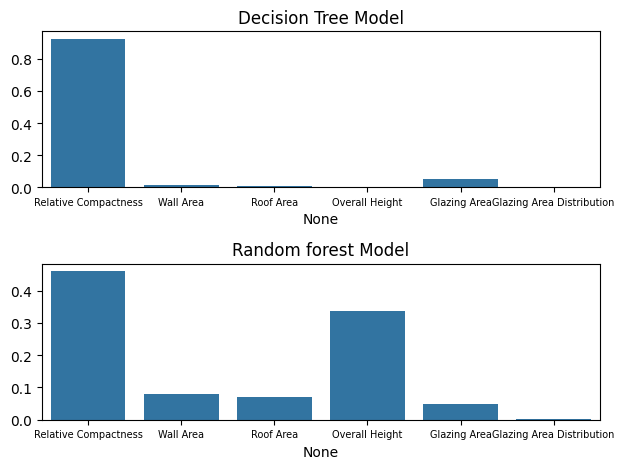

In [45]:
plt.figure(figsize=(15,10))
fig,ax=plt.subplots(nrows=2, ncols=1)
models=["Decision Tree", "Random forest"]
feat_import=[dt_feature_importance,rf_feature_importance]
for i,model in enumerate(models):
    sns.barplot( y=feat_import[i], x=X_train.columns,ax=ax[i])
    ax[i].set_title(f"{model} Model")
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=7)  # Set x-axis tick label font size

plt.tight_layout()  #adjust spacing between subplots to minimize the overlaps.

**Decision Tree:**

Relative Compactness has the highest importance score (0.836), indicating it is the most important feature in the Decision Tree model. It has a strong impact on the model's decisions.

Glazing Area is the next most important feature (0.048), but its importance is considerably lower than Relative Compactness.

Wall Area and Roof Area have relatively low importance scores (0.102 and 0.010, respectively).

Overall Height and Glazing Area Distribution have the lowest importance scores (close to 0), suggesting they have little impact on the model's decisions.

**Random Forest:**

Relative Compactness still has the highest importance (0.418), but its importance is relatively lower than in the Decision Tree.

Overall Height is the second most important feature (0.346) in the Random Forest model, which suggests it has a significant influence.

Roof Area and Wall Area have moderate importance scores (0.103 and 0.079, respectively).

Glazing Area andGlazing Area Distribution have lower importance scores compared to other features, but they are not negligible.

**CONCLUSION**

In this notebook, different models were explored for the prediction the cooling energy consumption in residential building. Tree-based models performed better amongst other regression models.

**RECOMMENDATION**

A more robust and diverse dataset will give a better model that can predict cooling energy consumption for different types of residential buildings. The predictions can be used in the design and sizing of HVAC systems in buildings.

In [46]:
def predict_price(relative_compactness,wall_area,roof_area, overall_height,glazing_area, glazing_area_distribution):

    X0 = relative_compactness
    X1 = wall_area
    X2 = roof_area
    X3 = overall_height
    X4 = glazing_area
    X5 = glazing_area_distribution

    return dt_model.predict([[X0,X1,X2,X3,X4,X5]])

In [47]:
predict_price(0.82,	318.5,	147.00,	7.0,	0.10, 1)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([26.5115])

In [51]:
import pickle
with open('energy_efficieny_model.pickle','wb') as output_file:
    pickle.dump(dt_model, output_file)